<a href="https://colab.research.google.com/github/junghodavidlee/Project-3/blob/maddie_jankowski/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas and numpy
import pandas as pd
import numpy as np
# Import the required dependencies from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt # Import the library


# Set the column width to view the text message data.
pd.set_option('max_colwidth', 200)

In [ ]:
! pip install fastparquet
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd

splits = {'train': 'train.parquet', 'validation': 'validation.parquet', 'test': 'test.parquet'}
df = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Import the IMDB dataset
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
# Import the IMDB dataset
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df.head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",positive


In [ ]:
# Change the name of the review column to "text" and the sentiment column to "label"
imdb_df.rename(columns={'review': 'text', 'sentiment': 'label'}, inplace=True)
imdb_df.head()

,text,label
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",positive


In [ ]:
# Change the label column to have positive be 1 and negative be 0
imdb_df['label'] = imdb_df['label'].map({'positive': 1, 'negative': 0})
imdb_df.head()

,text,label
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",1


In [ ]:
df.head(20)

,text,label
0,"the rock is destined to be the 21st century's new "" conan "" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .",1
1,"the gorgeously elaborate continuation of "" the lord of the rings "" trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r ...",1
2,effective but too-tepid biopic,1
3,"if you sometimes like to go to the movies to have fun , wasabi is a good place to start .",1
4,"emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",1
5,the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .,1
6,offers that rare combination of entertainment and education .,1
7,perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .,1
8,steers turns in a snappy screenplay that curls at the edges ; it's so clever you want to hate it . but he somehow pulls it off .,1
9,take care of my cat offers a refreshingly different slice of asian cinema .,1


In [ ]:
# Show the value count for the label column
df['label'].value_counts()

,count
label,
1,4265
0,4265


In [ ]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530 entries, 0 to 8529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8530 non-null   object
 1   label   8530 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.4+ KB


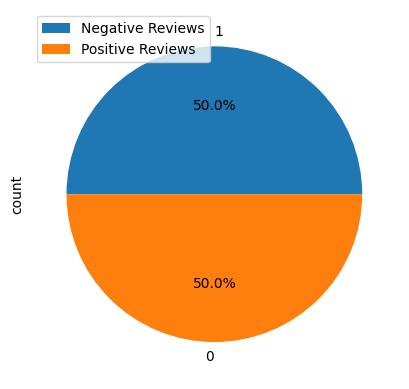

In [ ]:

# Make a pie chart that shows the value count for the label column
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Relabel the labels as 0 = "Negative Reviews" and 1 = "Positive Reviews" on the pie chart
plt.legend(['Negative Reviews', 'Positive Reviews'])

In [ ]:
# Set the features variable to the "text" column
X = df['text']
# Set the target variable to the "label" column
y = df['label']
# Split the data into train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a list of custom stopwords
custom_stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [ ]:
# Build a pipline using TfidfVectorizer(), with custom_stopwords and LinearSVC
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=custom_stopwords, ngram_range=(1,2), max_df=0.9, min_df=2, sublinear_tf=True)),
                     ('clf', LinearSVC(C=1, loss='squared_hinge', penalty='l2', dual=True))])
# Fit the data to the model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2),
                                 stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...],
                                 sublinear_tf=True)),
                ('clf', LinearSVC(C=1, dual=True))])

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train accuracy:', text_clf.score(X_train, y_train))
print('Test accuracy:', text_clf.score(X_test, y_test))

Train accuracy: 0.9935521688159438
Test accuracy: 0.7678780773739742


In [ ]:
# Create a confusion matrix on the test data and predictions
predictions = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[643 205]
 [204 654]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       848
           1       0.76      0.76      0.76       858

    accuracy                           0.76      1706
   macro avg       0.76      0.76      0.76      1706
weighted avg       0.76      0.76      0.76      1706

0.7602579132473622


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# List of movie reviews
reviews = df["text"].tolist()

# Process each review and extract entities
for review in reviews[:10]:
    doc = nlp(review)
    print(f"Review: {review}")
    for ent in doc.ents:
        print(f"  Entity: {ent.text}, Label: {ent.label_}")
    print("-" * 50)

Review: the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
  Entity: the 21st century's, Label: DATE
  Entity: jean, Label: NORP
--------------------------------------------------
Review: the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .
  Entity: peter jackson, Label: PERSON
  Entity: tolkien, Label: PERSON
--------------------------------------------------
Review: effective but too-tepid biopic
--------------------------------------------------
Review: if you sometimes like to go to the movies to have fun , wasabi is a good place to start .
--------------------------------------------------
Review: emerges as something rare , an issue movie that's so honest and keenly observed that it 

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


def vader_review(review):
    # Get sentiment scores for the current review
    scores = sia.polarity_scores(review)

    # Interpretation based on compound score
    compound_score = scores['compound']
    if compound_score >= 0.1:
        return f"Overall Sentiment: Positive 😊 \n Sentiment Scores:, {scores}"
    elif compound_score <= -0.1:
        return f"Overall Sentiment: Negative 😡 \n Sentiment Scores:, {scores}"
    else:
        return f"Overall Sentiment: Neutral 😐 \n Sentiment Scores:, {scores}"

In [ ]:
# gradio interface
import gradio as gr
func = gr.Interface(
    fn=vader_review,
    inputs=gr.Textbox(
    label="Enter your review here",
    lines=3,
    max_lines=5,
    interactive=True
),
    outputs=gr.Textbox(label='Review')
)
func.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d4f10f279fe142055.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

with gr.Blocks() as demo:
    gr.Markdown("# Beautiful Gradio Interface 🌟")

    with gr.Row():
        input_text = gr.Textbox(label="Enter Text", interactive=True)
        analyze_button = gr.Button("Analyze")

    output_label = gr.Label(label="Sentiment Result")

    analyze_button.click(lambda text: "Positive" if "good" in text else "Negative", input_text, output_label)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9efa2074a072bfc1f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sentiment Analysis Function
def vader_review(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "😊 Positive"
    elif score <= -0.05:
        return "😠 Negative"
    else:
        return "😐 Neutral"

# Improved Gradio Interface
with gr.Blocks(css=".gradio-container {background-color: #f5f7fa; font-family: Arial;}") as demo:
    gr.Markdown("## 🌟 Sentiment Analyzer 🌟")
    gr.Markdown("Enter your review, and we'll analyze its sentiment!")

    with gr.Row():
        input_text = gr.Textbox(
            label="📝 Enter your review",
            lines=3,
            max_lines=5,
            interactive=True,
            placeholder="Type your review here..."
        )

    analyze_button = gr.Button("🔍 Analyze Sentiment")

    with gr.Row():
        output_label = gr.Textbox(label="🔽 Sentiment Result", interactive=False)

    analyze_button.click(vader_review, input_text, output_label)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e681c38b5a8e2233e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# In the label column, replace 0 with negative and 1 with positive
df["label"] = df["label"].replace({0: "negative", 1: "positive"})

In [ ]:
import seaborn as sns

In [ ]:
df['text']

,text
0,"the rock is destined to be the 21st century's new "" conan "" and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."
1,"the gorgeously elaborate continuation of "" the lord of the rings "" trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r ..."
2,effective but too-tepid biopic
3,"if you sometimes like to go to the movies to have fun , wasabi is a good place to start ."
4,"emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."
...,...
8525,any enjoyment will be hinge from a personal threshold of watching sad but endearing characters do extremely unconventional things .
8526,"if legendary shlockmeister ed wood had ever made a movie about a vampire , it probably would look a lot like this alarming production , adapted from anne rice's novel the vampire chronicles ."
8527,"hardly a nuanced portrait of a young woman's breakdown , the film nevertheless works up a few scares ."
8528,"interminably bleak , to say nothing of boring ."


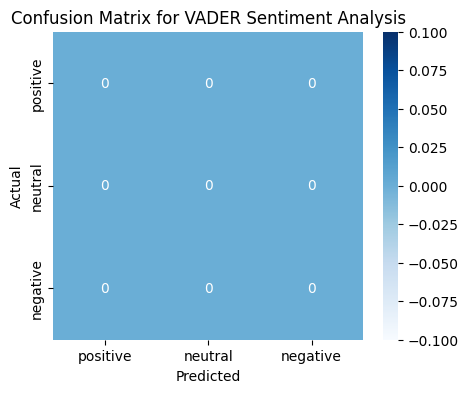

In [ ]:

# Generate confusion matrix
#df["predicted_sentiment"] = df["text"].apply(vader_review)
# Generate confusion matrix
#cm = confusion_matrix(df["label"], df["predicted_sentiment"], labels=["positive", "neutral", "negative"])
# Plot confusion matrix
#plt.figure(figsize=(5,4))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Confusion Matrix for VADER Sentiment Analysis")
#plt.show()
# Print classification report
#print(classification_report(df["label"], df["predicted_sentiment"]))


In [ ]:
# Set the features variable to the "text" column
X = imdb_df['text']
# Set the target variable to the "label" column
y = imdb_df['label']
# Split the data into train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Build a pipline using TfidfVectorizer(), with custom_stopwords and LinearSVC
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=custom_stopwords, ngram_range=(1,2), max_df=0.9, min_df=2, sublinear_tf=True)),
                     ('clf', LinearSVC(C=1, loss='squared_hinge', penalty='l2', dual=True))])
# Fit the data to the model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2),
                                 stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...],
                                 sublinear_tf=True)),
                ('clf', LinearSVC(C=1, dual=True))])

In [18]:
# Validate the model by checking the model accuracy with model.score
print('Train accuracy:', text_clf.score(X_train, y_train))
print('Test accuracy:', text_clf.score(X_test, y_test))

Train accuracy: 0.9998
Test accuracy: 0.9171


In [19]:
# Create a confusion matrix on the test data and predictions
predictions = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[4508  453]
 [ 376 4663]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4961
           1       0.91      0.93      0.92      5039

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

0.9171


In [21]:
# Test a sample review "I thought the movie was slow and I wasn't very engaged"
sample = text_clf.predict(["I thought the movie was slow and I wasn't very engaged"])
sample

array([0])

In [22]:
# Test another sample review "This movie brought me so much joy. I loved the part with the animals"
sample = text_clf.predict(["This movie brought me so much joy. I loved the part with the animals"])
sample

array([1])